In [2]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 
import os
import yaml

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
import numpy as np


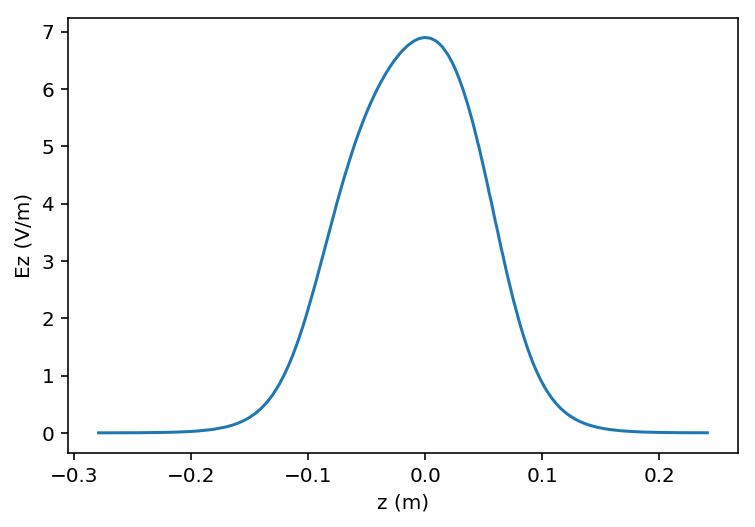

In [40]:
from scale_map import load_map, get_oncrest_phase, integrateReEz, save_map

f0 = 197e6
zf, Ef = load_map('197MHz.data.txt', center=True, zscale=1/100)

Ef = Ef/integrateReEz(zf, Ef, phi0, f0)

plt.plot(zf, Ef);
plt.xlabel('z (m)');
plt.ylabel('Ez (V/m)');

phi0 = get_oncrest_phase(zf, Ef, f0)
phi02 = get_oncrest_phase2(zf, Ef, f0)

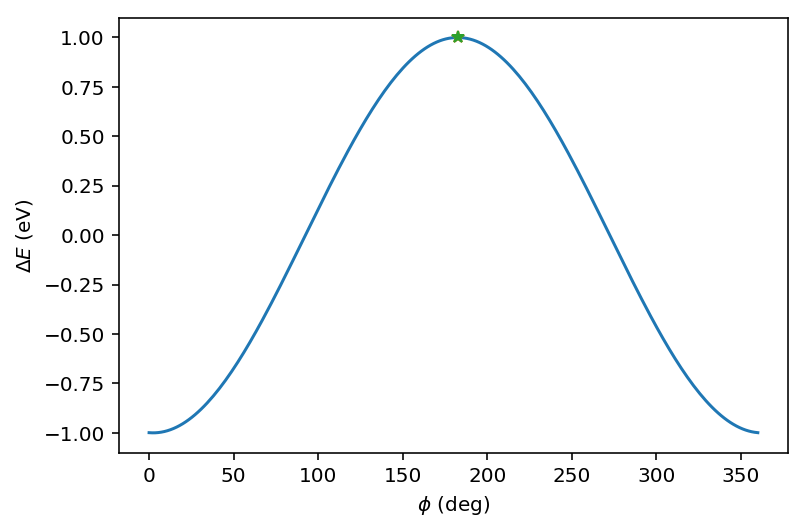

In [42]:
phis = np.linspace(0,360,200)
dE = list(map(lambda phi: integrateReEz(zf, Ef, phi, f0), phis))
dE1 = integrateReEz(zf, Ef, phi0, f0)
dE2 = integrateReEz(zf, Ef, phi02, f0)

plt.plot(phis, dE, phi0, dE1, '*', phi02, dE2, '*');
plt.xlabel('$\phi$ (deg)');
plt.ylabel('$\Delta E$ (eV)');

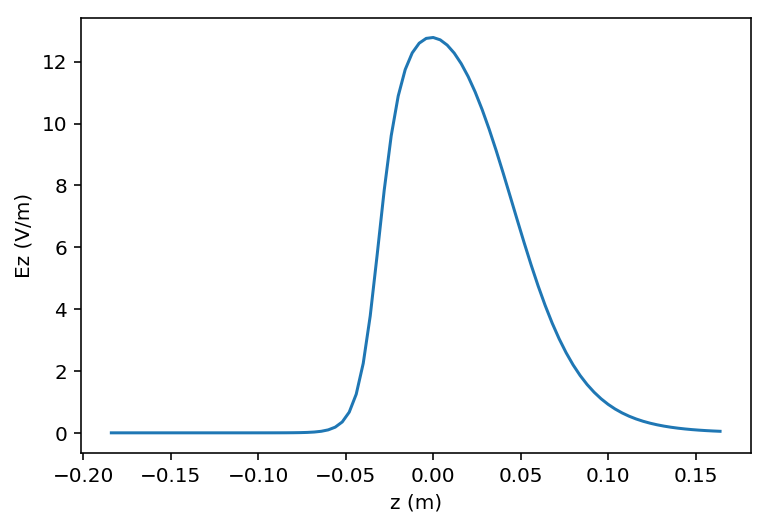

In [20]:
from scale_map import *

f3 = 591e6
zf, Ef = load_map('591MHz.data.txt', center=True, zscale=1/100)

phi0 = get_oncrest_phase(zf, Ef, f3)
Ef = Ef/integrateReEz(zf, Ef, phi0, f3)

plt.plot(zf, Ef);
plt.xlabel('z (m)');
plt.ylabel('Ez (V/m)');

save_map(zf, Ef, '591MHz.qw.cavity.txt')

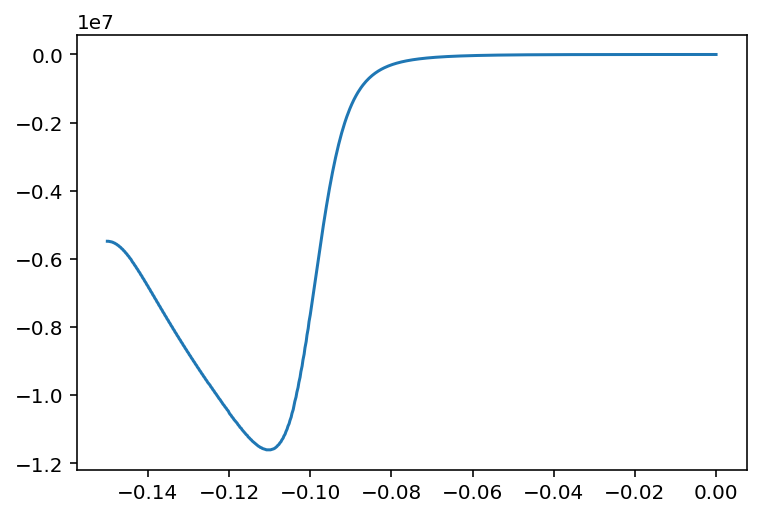

In [5]:
data = np.loadtxt('dcgun_GHV.txt', skiprows=1)
r = data[:,0]
z = data[:,1][r==0]
E = data[:,3][r==0]

dat = np.zeros( (len(z),2) )
dat[:,0] = z
dat[:,1] = E

np.savetxt('dcgun_GHV.1d.txt',dat, header='Z Ez', comments=' ')

plt.plot(z, E);

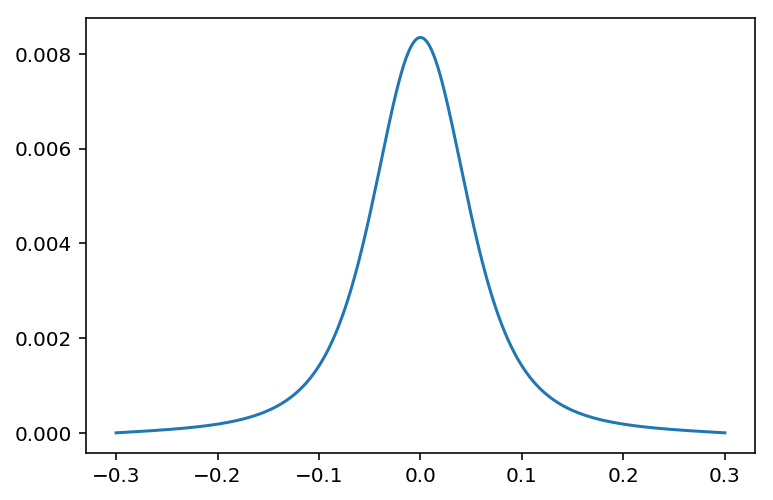

In [6]:
data = np.loadtxt('solenoid_SLA_L60.txt', skiprows=1)
r = data[:,0]
z = data[:,1][r==0]
B = data[:,3][r==0]

dat = np.zeros( (len(z),2) )
dat[:,0] = z
dat[:,1] = B

np.savetxt('solenoid_SLA_L60.1d.txt',dat, header='Z Bz', comments=' ')

plt.plot(z, B);

180.0 180.0


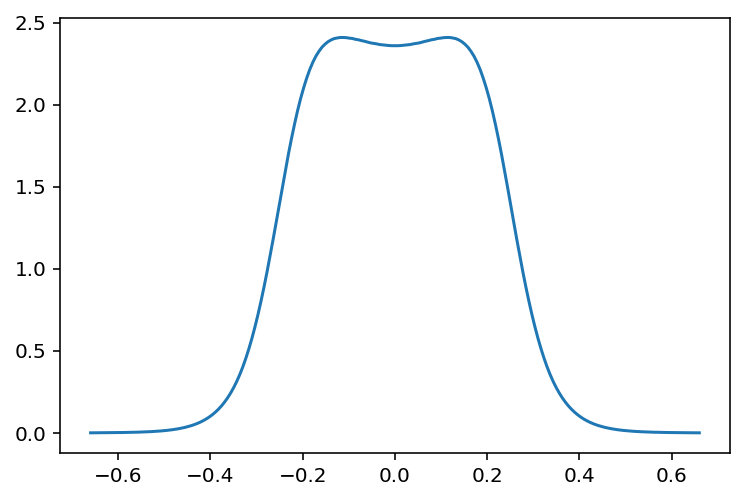

In [43]:
data = np.loadtxt('CTB.197.MHz.txt', skiprows=1)

r = data[:,0]
z = data[:,1][r==0]
Ez =data[:,3][r==0]

plt.plot(z, Ez);

integrateReEz(z, Ez, 180, f0)
print(get_oncrest_phase(z, Ez, f0), get_oncrest_phase2(z, Ez, f0))